# EARTHQUAKES AROUND THE GLOBE (PROJECT NOTEBOOK)
___
___

# TABLE OF CONTENTS
___
1. [Introduction](#introduction)
2. [Objectives & Scope](#objectives_and_scope)
3. [Data](#data)
4. [Analysis:](#analysis)
    * [Importing Required Libraries](#one)
    * [Importing Earthquake Data From A Local CSV File Into A DataFrame](#two)
    * [A Look At The Columns Of The DataFrame](#three)
    * [Dropping Unwanted Rows From The DataFrame](#four)
    * [Total Number Of Earthquakes In The Past One Month](#fourhalf)
    * [Converting Date And Time Into Required Format](#five)
    * [Creating A New DataFrame With The Relevant Data](#six)
    * [Cleaning Up The Data-Frame](#seven)
    * [A Look At The Top 15 Earthquakes (By Magnitudes)](#sevenhalf)
    * [Visualizing The Frequency Distribution Of Magnitudes](#eight)
    * [Visualizing The Proportions Of Depth Categories](#nine)
    * [Visualizing The Maximum Magnitude For Each Date](#ten)
    * [Visualizing The Top 15 Earthquakes (By Magnitudes) On A World Map](#onetwo)
    

5. [Results](#results)
    * [The Total Number Of Earthquakes That Occured In The Past One Month](#fiveone)
    * [The Top 15 Earthquakes (By Magnitude)](#fivetwo)
    * [A Visual Representation Of The Frequency Distribution Of Magnitudes](#fivethree)
    * [A Visual Representation Of The Proportion Of Depth Categories](#fivefour)
    * [A Visual Representation Of The Highest Magnitude For Each Date](#fivefive)
    * [Visualizing The Top 15 Earthquakes (By Magnitude) On A World Map](#fivesix)
    

6. [Discussion](#discussion)
7. [Conclusion & Acknowledgements](#caa)

# 1. INTRODUCTION<a name="introduction"></a>
___
An earthquake (also known as a quake, tremor or temblor) is the shaking of the surface of the Earth resulting from a sudden release of energy in the Earth's lithosphere that creates seismic waves. Earthquakes can range in size from those that are so weak that they cannot be felt to those violent enough to propel objects and people into the air, and wreak destruction across entire cities. At the Earth's surface, earthquakes manifest themselves by shaking and displacing or disrupting the ground. The epicenter of an earthquake is the point on the Earth's surface vertically above the focus of the earthquake. When the epicenter of a large earthquake is located offshore, the seabed may be displaced sufficiently to cause a tsunami. Earthquakes can also trigger landslides and occasionally, volcanic activity. The most commonly used scale to measure the magnitudes of earthquakes is the Richter Scale. The scale ranges from 0-9.

# 2. OBJECTIVES AND SCOPE<a name="objectives_and_scope"></a>
___
The main aim of this project is to develop an earthquake information system that shall provide information about all the earthquakes that occured worldwide during a given period of time. This project aims to fulfill the following objectives:

1. Identify the total number of earthquakes that occured in the given period of time.
2. Identify the top 15 earthquakes (by magnitudes).
3. Provide a visual representation of the frequency distribution of magnitudes of the earthquakes.
4. Provide a visual reperesentation of numerical proportions of the depths with respect to the following categories:
    * 0-10 KM
    * 10-20 KM
    * 20-30KM
    * 30+ KM
5. Provide a visual representation of the earthquake with the highest magnitude for each date in the given period.
6. Plot the epicenters of the top 15 (by magnitude) earthquakes on a world map with relevant popups for the location, co-ordinates, date, day, time, magnitude and depth (in kilometers).

# 3. DATA<a name="data"></a>
___
The data used in this project is obtained from the United States Geological Survey's (USGS) website. The website provides all the relevant information related to an earthquake that occurs anywhere on the globe. It has an API which was used to obtain a CSV file. The CSV file is stored locally and will be used to produce DataFrames containing the required information for the given period of time. For this project, the CSV file contains earthquake data from 18 July 2020 to 16 August 2020. The DataFrames produced will be used to achieve the objectives highlighted in the previous section. The data to be used in producing the DataFrames is as follows:
1. Date and time (UTC) of the earthquake.
2. Latitude of the epicenter.
3. Longitude of the epicenter.
4. Magnitude of the earthquake (Richter scale).
5. Depth beneath the surface (in Kilometers).
6. Location of the earthquake.

*Note: The process of using the USGS API and obtaining the CSV file is not a part of this project*

# 4. ANALYSIS<a name="analysis"></a>
___
## Importing Required Libraries<a name="one"></a>

In [1]:
# For creating and working with DataFrames
import pandas as pd

# For creating visualizations
import matplotlib.pyplot as plt

# For working with geographical maps
import folium

## Importing Earthquake Data From A Local CSV File Into A DataFrame<a name="two"></a>

In [2]:
# Obtaining the data from a local CSV file
original_df = pd.read_csv("data.csv")

# Displaying the first 5 rows
original_df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-08-16T23:49:29.140Z,37.521500,-118.823833,7.20,0.56,md,9.0,302.00,0.068540,0.05,...,2020-08-17T03:12:03.832Z,"13km WSW of Toms Place, CA",earthquake,0.92,1.78,0.117000,9.0,reviewed,nc,nc
1,2020-08-16T23:40:31.370Z,35.791833,-117.748833,10.78,0.72,ml,8.0,102.00,0.021180,0.19,...,2020-08-17T12:38:48.294Z,"17km NNE of Inyokern, CA",earthquake,0.71,0.92,0.049000,11.0,reviewed,ci,ci
2,2020-08-16T23:40:11.200Z,38.824667,-122.801833,2.96,1.26,md,42.0,31.00,0.006561,0.03,...,2020-08-21T22:54:04.226Z,"7km NW of The Geysers, CA",earthquake,0.15,0.27,0.130000,10.0,reviewed,nc,nc
3,2020-08-16T23:37:10.920Z,38.022200,-117.992300,6.50,0.80,ml,8.0,213.47,0.034000,0.12,...,2020-08-17T00:03:16.592Z,"39 km N of Dyer, Nevada",earthquake,NaN,5.80,NaN,NaN,automatic,nn,nn
4,2020-08-16T23:35:02.690Z,19.472333,-155.587833,-2.49,1.27,md,31.0,55.00,NaN,0.23,...,2020-08-18T03:04:03.980Z,"29 km E of Honaunau-Napoopoo, Hawaii",earthquake,0.31,0.18,0.070481,8.0,reviewed,hv,hv


## A Look At The Columns Of The DataFrame<a name="three"></a>

In [3]:
# Print columns of the DataFrame
print(original_df.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


## Dropping Unwanted Rows From The DataFrame<a name="four"></a>

In [4]:
# A look at the different types of data available
print(original_df['type'].value_counts())

# Dropping unwanted rows
original_df = original_df[original_df.type == 'earthquake']

earthquake      15607
other event       147
quarry blast      116
explosion          72
ice quake          57
Name: type, dtype: int64


## Total Number Of Earthquakes In The Past One Month<a name="fourhalf"></a>

In [5]:
# Total number of earthquakes
total = len(original_df)

# String to print
to_print = 'A total of {} earthquakes occured in the past one month'.format(total)

# Printing
print(to_print)

A total of 15607 earthquakes occured in the past one month


## Converting Date And Time To The Required Format<a name="five"></a>

In [6]:
# Defining empty lists as placeholders for date and time
dt = []
tm = []

# Converting to required format
for i in original_df['time']:
    j = i.split('T')
    
    # Date
    crude_d = j[0].split('-')
    d = crude_d[2] + '-' + crude_d[1] + '-' + crude_d[0]
    
    # Time
    crude_t = j[1].split('.')
    t = crude_t[0]
    
    # Appending to respective lists
    dt.append(d)
    tm.append(t)
    
# Converting to Series and adding to the DataFrame
del original_df['time']
original_df['date'] = pd.Series(dt)
original_df['time'] = pd.Series(tm) 

## Creating A New DataFrame With The Relevant Data<a name="six"></a>

In [7]:
# Creating DataFrame
df = original_df[['date','time','latitude','longitude','depth','mag','place']]

# Displaying first 5 rows
df.head(5)

,date,time,latitude,longitude,depth,mag,place
0,16-08-2020,23:49:29,37.521500,-118.823833,7.20,0.56,"13km WSW of Toms Place, CA"
1,16-08-2020,23:40:31,35.791833,-117.748833,10.78,0.72,"17km NNE of Inyokern, CA"
2,16-08-2020,23:40:11,38.824667,-122.801833,2.96,1.26,"7km NW of The Geysers, CA"
3,16-08-2020,23:37:10,38.022200,-117.992300,6.50,0.80,"39 km N of Dyer, Nevada"
4,16-08-2020,23:35:02,19.472333,-155.587833,-2.49,1.27,"29 km E of Honaunau-Napoopoo, Hawaii"


## Cleaning Up The Data-Frame<a name="seven"></a>

In [8]:
# Removing earthquakes with negative magnitudes
df = df[df.mag >= 0]

# Removing earthquakes with negative depths
df = df[df.depth >= 0]

# Removing rows with NoneType values
df = df.dropna()

## A Look At The Top 15 Earthquakes (By Magnitudes)<a name="sevenhalf"></a>

In [9]:
# Getting the rows for the top 15 earthquakes
max_df = df.sort_values(by=['mag'],ascending=False)[0:15]

# Displaying the top 15 earthquakes
max_df

,date,time,latitude,longitude,depth,mag,place
13918,21-07-2020,12:29:23,55.0683,-158.5543,28.00,7.8,Alaska Peninsula
7042,01-08-2020,10:39:03,7.2781,124.1199,480.60,6.4,"11 km SE of Litayan, Philippines"
5140,05-08-2020,06:40:49,-16.1118,168.0816,174.75,6.4,"71 km E of Lakatoro, Vanuatu"
10912,25-07-2020,15:13:21,-60.7812,-25.4055,10.00,6.4,South Sandwich Islands region
4459,06-08-2020,19:48:15,-41.6794,42.4486,10.00,6.3,Prince Edward Islands region
13305,22-07-2020,13:59:52,33.1463,86.8666,10.00,6.3,western Xizang
13917,21-07-2020,12:41:14,54.9690,-159.0413,16.53,6.1,"101 km ESE of Sand Point, Alaska"
6991,01-08-2020,13:37:22,-3.1912,148.6412,10.00,6.1,"198 km SE of Lorengau, Papua New Guinea"
9505,27-07-2020,22:27:15,54.8674,-161.1436,41.26,6.1,"66 km SW of Sand Point, Alaska"
14105,21-07-2020,03:14:08,-20.8045,-178.6325,605.20,6.0,Fiji region


## Visualizing The Frequency Distribution Of Magnitudes<a name="eight"></a>

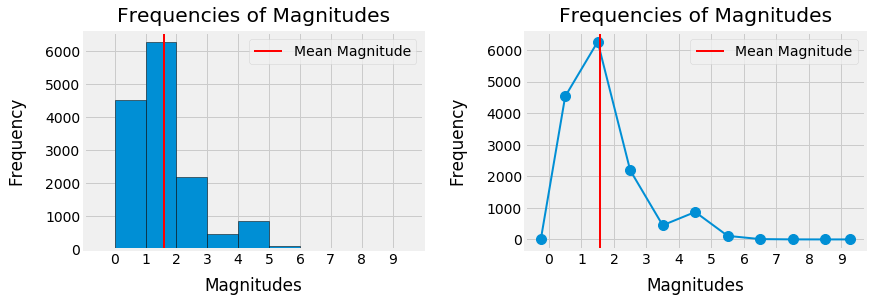

In [10]:
# Histogram and Frequency Polygon for magnitudes

# Defining the figure size and style
fig1 = plt.figure(figsize = (14, 4))
plt.style.use('fivethirtyeight')

# Histogram
ax1 = plt.subplot(1, 2, 1)
bi = [-0.5,0,1,2,3,4,5,6,7,8,9,9.5]
y,bi,_ = plt.hist(df['mag'],bins=bi,edgecolor='black') #log=True

# Plotting a line for the mean(average) magnitude
avg = df.mean()['mag']
plt.axvline(avg,color='red',label='Mean Magnitude',linewidth=2)

# Dealing with the legend, ticks, labels and title
plt.grid(True)
plt.legend()
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel('Magnitudes',labelpad=10)
plt.ylabel('Frequency',labelpad=20)
plt.title('Frequencies of Magnitudes',pad=10)

# Adding space between subplots
plt.subplots_adjust(wspace=0.3)

# Frequency Polygon
ax1 = plt.subplot(1, 2, 2)
midd = 0.5 * (bi[1:] + bi[:-1])
plt.plot(midd,y,linewidth=2,marker='.',markersize=20)

# Plotting a line for the mean(average) magnitude
plt.axvline(avg,color='red',label='Mean Magnitude',linewidth=2)

# Dealing with the legend, ticks, labels and title
plt.grid(True)
plt.legend()
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel('Magnitudes',labelpad=10)
plt.ylabel('Frequency',labelpad=20)
plt.title('Frequencies of Magnitudes',pad=10)
plt.show()

## Visualizing The Proportions Of Depth Categories<a name="nine"></a>

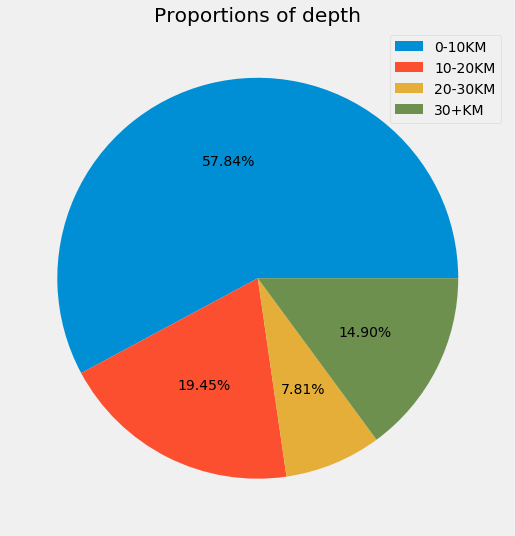

In [11]:
# Pie Chart to represent proportions of depths

# Defining categories and their labels for depths

first = df['depth'].between(0,10).sum()
second = df['depth'].between(10.001,20).sum()
third = df['depth'].between(20.001,30).sum()
fourth = df['depth'].between(30.001,df['depth'].max()).sum()
data = [first,second,third,fourth]
labels = ['0-10KM','10-20KM','20-30KM','30+KM']

# Defining the figure size and style
fig2 = plt.figure(figsize = (8, 9))
plt.style.use('fivethirtyeight')

# Plot the chart and display
plt.pie(data,autopct='%.2f%%')
plt.title('Proportions of depth')
plt.legend(labels)
plt.show()

## Visualizing The Maximum Magnitude For Each Date<a name="ten"></a>

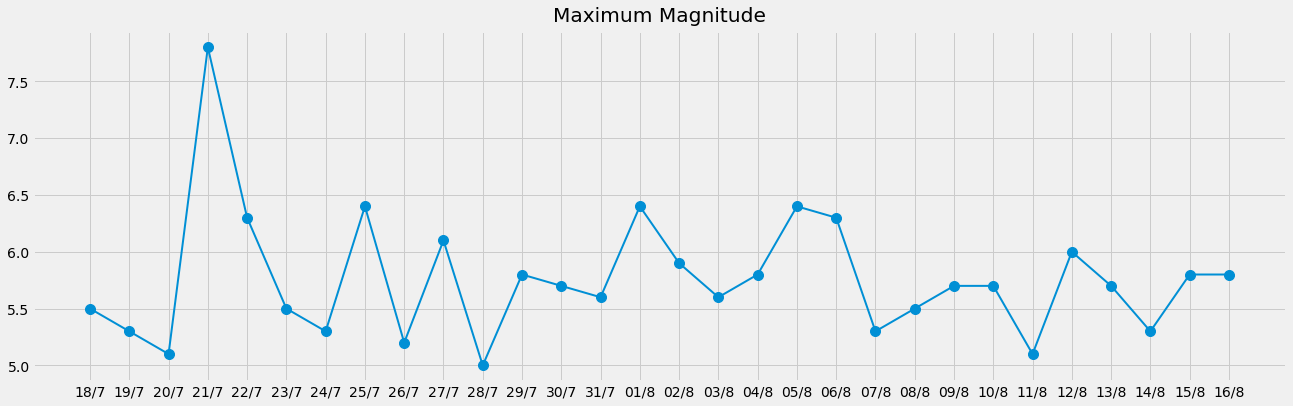

In [12]:
# Line plot for the maximum magnitude for each date

# Getting all the dates for which the data is available
dates = df['date'].unique()

# Creating a list of the maximum magnitude for each date, reformatting each date and storing in a separate list (to be used as labels for the plot)
fdates = []
maxm = []
for date in dates:
    rows = df[df.date == date]
    maxm.append(rows['mag'].max())
    dat = date.split('-')
    fdate = dat[0] + '/' + dat[1][1]
    fdates.append(fdate)

# Reversing lists to maintain chronological order
fdates.reverse()
maxm.reverse()

# Plot the chart and display
fig3 = plt.figure(figsize = (20, 6))
plt.plot(fdates, maxm, linewidth=2, marker='.', markersize=20)
plt.title('Maximum Magnitude',pad=10)
plt.xticks(fdates)
plt.show()

## Visualizing The Top 15 Earthquakes (By Magnitudes) On A World Map<a name="onetwo"></a>

In [13]:
# Plotting the top 15 mags on a world map

# Defining the starting coordinates for the map
start_x = (max(max_df['latitude']) + min(max_df['latitude'])) / 2
start_y = (max(max_df['longitude']) + min(max_df['longitude'])) / 2

# Creating an empty world map
m = folium.Map(location = [start_x, start_y], zoom_start=0.5)

# Plotting the epicenters on the empty world map with relevent popups
for date,time,lat,long,depth,mag,place in zip(max_df['date'], max_df['time'],max_df['latitude'],max_df['longitude'],max_df['depth'],max_df['mag'],max_df['place']):
    text = 'Date : ' + date + '; Time : ' + time + '; Magnitude : ' + str(mag) + '; Depth : ' + str(depth) + '; Place/Region : ' + place
    
    # Highlighting the earthquake with the maximum magnitude    
    if mag == max(max_df['mag']):
        folium.CircleMarker(location=[lat,long],radius=8,tooltip='Click for more info',popup=folium.Popup(text,max_width=500),color='black',fill_color='black',fill=True,fill_opacity=1).add_to(m)
    else:
        folium.CircleMarker(location=[lat,long],radius=8,tooltip='Click for more info',popup=folium.Popup(text,max_width=500),color='red',fill_color='red',fill=True,fill_opacity=1).add_to(m)

# Displaying the map
m

# 5. Results<a name="results"></a>
___
## i) The Total Number Of Earthquakes That Occured In The Past One Month<a name="fiveone"></a>

In [14]:
to_print = 'As discovered in the analysis of the data, there were a total of {} earthquakes that occured in the given period.'.format(total)
print(to_print)

As discovered in the analysis of the data, there were a total of 15607 earthquakes that occured in the given period.


## ii) The Top 15 Earthquakes (By Magnitude)<a name="fivetwo"></a>
The top 15 earthquakes are represented as follows:

In [15]:
max_df

,date,time,latitude,longitude,depth,mag,place
13918,21-07-2020,12:29:23,55.0683,-158.5543,28.00,7.8,Alaska Peninsula
7042,01-08-2020,10:39:03,7.2781,124.1199,480.60,6.4,"11 km SE of Litayan, Philippines"
5140,05-08-2020,06:40:49,-16.1118,168.0816,174.75,6.4,"71 km E of Lakatoro, Vanuatu"
10912,25-07-2020,15:13:21,-60.7812,-25.4055,10.00,6.4,South Sandwich Islands region
4459,06-08-2020,19:48:15,-41.6794,42.4486,10.00,6.3,Prince Edward Islands region
13305,22-07-2020,13:59:52,33.1463,86.8666,10.00,6.3,western Xizang
13917,21-07-2020,12:41:14,54.9690,-159.0413,16.53,6.1,"101 km ESE of Sand Point, Alaska"
6991,01-08-2020,13:37:22,-3.1912,148.6412,10.00,6.1,"198 km SE of Lorengau, Papua New Guinea"
9505,27-07-2020,22:27:15,54.8674,-161.1436,41.26,6.1,"66 km SW of Sand Point, Alaska"
14105,21-07-2020,03:14:08,-20.8045,-178.6325,605.20,6.0,Fiji region


## iii) A Visual Representation Of The Frequency Distribution Of Magnitudes<a name="fivethree"></a>
A visualization of the frequency distribution of magnitudes is represented by the following histogram and frequency polygon:

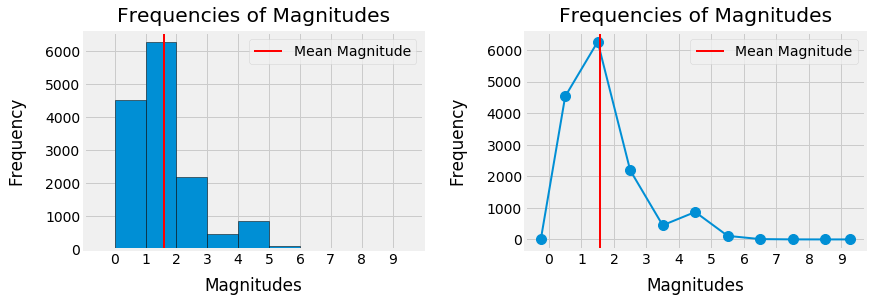

In [16]:
# Histogram and frequency polygon
fig1

## iv) A Visual Representation Of The Proportion Of Depth Categories<a name="fivefour"></a>
A visualization of the proportion of depth categories is as follows:

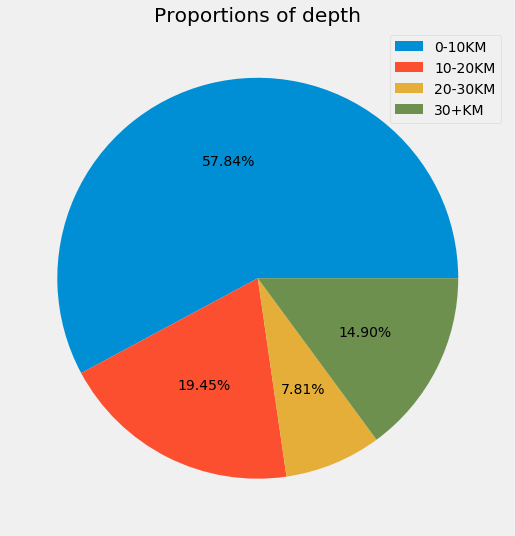

In [17]:
# Pie chart
fig2

## v) A Visual Representation Of The Highest Magnitude For Each Date<a name="fivefive"></a>
The highest magnitude for each date in the given period is visually represented by the following line plot:

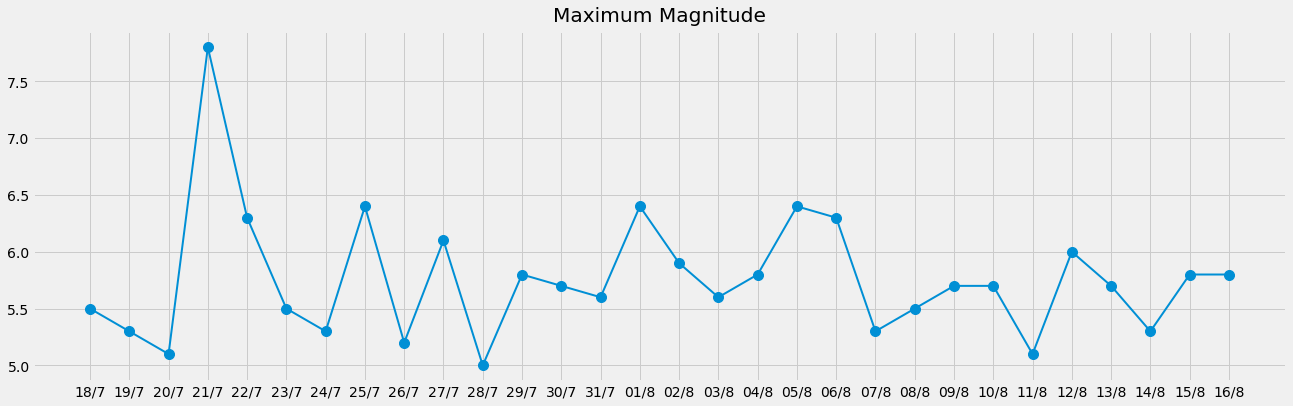

In [18]:
# Line chart
fig3

## vi) Visualizing The Top 15 Earthquakes (By Magnitude) On A World Map<a name="fivesix"></a>
The geographical locations of the top 15 earthquakes are represented by the following plot:

In [19]:
# World map
m

# 6. Discussion<a name="discussion"></a>
___
The analysis shows that there were a total of 15,607 earthquakes that occured during the given period of time. That is a very large number. However, it is evident from the frequency distribution visualizations of the magnitudes that a vast majority of the earthquakes had a magnitude between 1-2 on the Richter scale. The mean magnitude of all the earthquakes is around 1.5 on the Richter scale, as can be seen on the frequency distribution plots. In fact, it can clearly be seen that out of the 15,607 earthquakes, only about 1000 earthquakes had a magnitude greater than 4 on the Richter scale. Hence, it can be concluded that a majority of the earthquakes that occured during the given period of time had a weak intensity.

Information like the geographical co-ordinates, date, time, magnitude, depth (in kilometers) and the region of the epicenter for the top 15 (by magnitude) earthquakes can be obtained from the DataFrame representing them. 

From the pie chart depicting proportions of depth categories, it is evident that about 57% of the earthquakes occured at a depth of 0 to 10 kilometers beneath the earth's surface. About 19% had a depth between 10-20 kilometers. 7.89% of the total earthquakes occured at a depth between 20 to 30 kilometres and about 15% of the earthquakes had a depth of over 30 kilometers beneath the surface.

From the line chart depicting the highest magnitude earthquake recorded at each date, it can be seen that the highest intensity for the period was about 7.8 on the Richter scale. This particular earthquake occured on 21 July. It is also evident that the daily highest intensities for the given period lie between 5 (28 July) and 7.8 (21 July) on the Richter scale.

The geographical locations of the 15 most intense earthquakes, along with other relevant information, can be studied from the world map depicting their locations. It can be seen that the earthquakes are not uniformly scattered across the globe but tend to be clustered in certain regions.

# 7. CONCLUSION & ACKNOWLEDGEMENTS<a name="caa"></a>
___
The purpose of this project was to work with earthquake data from a given period of time and to analyze, explore and visualize the data in order to gain deeper insights into the earthquakes that occured during the period. All the objectives that were highlighted for the project were successfully fulfilled.

I would like to express my special thanks of gratitude to my teacher and principle Mrs. Tohima Rajput who gave me the golden opportunity to do this wonderful project which helped me learn many new concepts. I am really thankful to my brother who introduced me to programming and helped me through this project. I would also like to thank Corey Schafer and Traversy Media for their extraodinary Youtube tutorials.

This project would not have been possible without the support of my family, teachers and friends.